In [39]:
from keras.models import Sequential
from keras.layers import Dense

import os
import struct
import numpy as np
from matplotlib import pyplot
import matplotlib as mpl


# fix random seed for reproducibility
np.random.seed(7)

# Loading Training Dataset

In [40]:
def read(dataset = "training", path = "."):
    
    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise (ValueError, "Training or Testing")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    for i in range(len(lbl)):
        yield get_img(i)

def show(image):
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

# Training Data Example

60000
5
(28, 28)


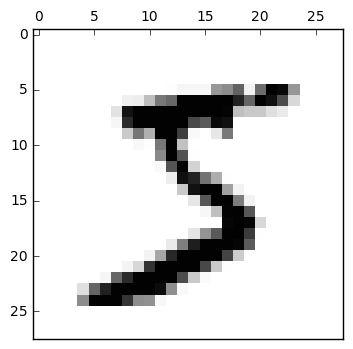

In [41]:
'''
    Summary of Training Data: There are 60000 records. Each image has 28*28 Pixels.
    Example of first record is shown below.
'''

training_data = list(read(dataset = 'training',path = './mnist'))
print(len(training_data))
label, pixels = training_data[0]
print(label)
print(pixels.shape)
show(pixels)

In [42]:
training_data_new = []
for record in training_data:
    label, pixels = record
    new_record = (label, pixels.flatten())
    training_data_new.append(new_record)


In [ ]:
unzipped = zip(*training_data_new )
print(list(unzipped))

In [43]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

NameError: name 'dataset' is not defined

# Building the Model

In [ ]:
'''
Summary of the model:
    1. There will be 2 hidden layers.
    2. Input layer will have 28*28 = 784 neurons
    3. Output Layer will have 10 nodes for each digit from 0-9
    4. Each Hidden layer will have 16 Neurons
'''

In [ ]:
model = Sequential()
model.add(Dense(784 , input_dim=784, activation='sigmoid'))
model.add(Dense(16 , activation='sigmoid'))
model.add(Dense(16 , activation='sigmoid'))
model.add(Dense(10 , activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, Y, epochs = 150 , batch_size = 10)